<a href="https://colab.research.google.com/github/KelvinLam05/Market-Basket-Analysis-with-Apriori/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

The aim of this project will be to identify the association rules for market basket analysis.

**Data set information**

The dataset has 38765 rows of the purchase orders of people from the grocery stores. 

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load dataset
df = pd.read_csv('/content/Groceries_dataset.csv')

In [4]:
# Examine the data
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
# Convert the column names to lower case
df.columns = map(str.lower, df.columns)

In [6]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   member_number    38765 non-null  int64 
 1   date             38765 non-null  object
 2   itemdescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Using the info function, we can pull the following information from our dataset:

*   We have no missing values in our dataset

In [7]:
# Convert the column 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Calculate the total products
df['itemdescription'].nunique()

167

In [9]:
# Calculate the top 10 frequently sold products
pd.crosstab(index = df['itemdescription'], columns = 'count').sort_values(['count'], ascending = False).head(10)

col_0,count
itemdescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


In [10]:
baskets = df.groupby(['member_number', 'date'])['itemdescription'].sum()

In [11]:
baskets

member_number  date      
1000           2014-06-24                   whole milkpastrysalty snack
               2015-03-15    sausagewhole milksemi-finished breadyogurt
               2015-05-27                        sodapickled vegetables
               2015-07-24                    canned beermisc. beverages
               2015-11-25                       sausagehygiene articles
                                                ...                    
4999           2015-05-16                 butter milkwhipped/sour cream
               2015-12-26                            bottled waterherbs
5000           2014-09-03                   fruit/vegetable juiceonions
               2014-11-16                  bottled beerother vegetables
               2015-10-02        sodaroot vegetablessemi-finished bread
Name: itemdescription, Length: 14963, dtype: object

In [12]:
# Convert the dataframe to list
lists = df.groupby(['member_number', 'date'])['itemdescription'].apply(lambda x: list(x))

In [13]:
lists

member_number  date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
                                                   ...                        
4999           2015-05-16                    [butter milk, whipped/sour cream]
               2015-12-26                               [bottled water, herbs]
5000           2014-09-03                      [fruit/vegetable juice, onions]
               2014-11-16                     [bottled beer, other vegetables]
               2015-10-02         [soda, root vegetables, semi-finished bread]
Name: itemdescription, Length: 14963, dtype: object

In [14]:
# Converting the dataframe into a list of lists 
transactions = lists.values.tolist()

In [15]:
transactions[:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

In [16]:
from mlxtend.preprocessing import TransactionEncoder

Using an TransactionEncoder object, we can transform this dataset into an array format suitable for typical machine learning APIs. Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array.

In [17]:
# Applying Transaction Encoder on dataset
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [18]:
# Turn the encoded array into a pandas DataFrame
transf_df = pd.DataFrame(te_ary, columns = te.columns_)

In [19]:
transf_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# Check column names 
transf_df.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
# I chose 0.005 minimum support
frequent_itemsets = apriori(transf_df, min_support = 0.005, use_colnames = True)

In [23]:
frequent_itemsets

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(soda, whole milk)"
122,0.005814,"(soda, yogurt)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(tropical fruit, yogurt)"


In [24]:
# Examining the frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [25]:
frequent_itemsets.head(5)

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.008087,(baking powder),1
2,0.033950,(beef),1
3,0.021787,(berries),1
4,0.016574,(beverages),1


In [26]:
frequent_itemsets.tail(5)

,support,itemsets,length
121,0.011629,"(soda, whole milk)",2
122,0.005814,"(soda, yogurt)",2
123,0.008220,"(tropical fruit, whole milk)",2
124,0.005213,"(tropical fruit, yogurt)",2
125,0.011161,"(whole milk, yogurt)",2


In total we got 126 rules with 0.005 minimum support.

If we print the value_counts( ) for the length column we will see that we get back a number of itemsets that contain multiple items and which contain single items.

In [27]:
frequent_itemsets['length'].value_counts()

1    89
2    37
Name: length, dtype: int64

How to measure the association rules?

1. **Support** how frequent an item-set is in all transactions. The ratio of the number of transactions in which item x appears to the total number of transactions.

2. **Confidence** how likely items are purchased together. The likelihood of item y being purchased when the item x is purchased.

3. **Lift** how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

A lift of over 1 is a strong sign that sales of the antecedent influence the consequent.

In [28]:
# Calculate association rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)

In [29]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579
1,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
2,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613
3,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963
4,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345


We can interpret the result of the first rule as:

* The support is 0.005 calculated by dividing the number of transactions    containing frankfurter and other vegetables by the total number of transactions.

* The confidence level is 0.136 shows that out of all the transactions that contain frankfurter 0.136 contain other vegetables too.

* The lift 1.116 tells us that other vegetables is 1.116 times more likely to be bought by the customer who also buys frankfurter.

As a result, if item X and Y are bought together more frequently, then several steps can be taken to increase the profit. For instance:

* Cross-Selling can be improved by combining products - items

* The shop layout can be changed so that sales can be improved when certain items are kept together.

* Promotional activities which are an advertising campaign can be carried out to increase the sales of goods that customers do not buy.

* Collective discounts can be offered on these products if the customer buys both of them.

**Visualize association rules**

In [39]:
# Examine the association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
0,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,other vegetables,frankfurter,0
1,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,frankfurter,other vegetables,1
2,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,sausage,soda,2
3,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,soda,sausage,3
4,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,sausage,yogurt,4
5,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,yogurt,sausage,5


**Scatter plot**

<Figure size 576x432 with 0 Axes>

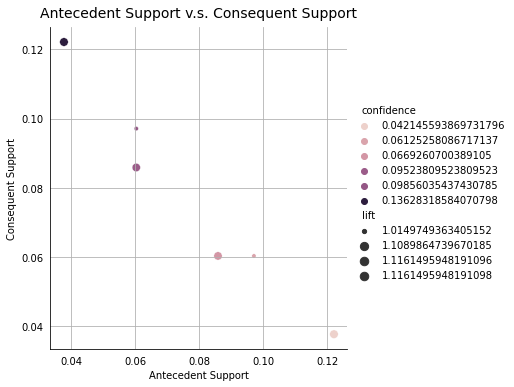

In [31]:
# Generate scatter plot 
plt.figure(figsize = (8, 6))
sns.relplot(x = 'antecedent support', y = 'consequent support', size = 'lift', hue = 'confidence', data = rules)
plt.title('Antecedent Support v.s. Consequent Support', fontsize = 14, pad = 10)
plt.xlabel('Antecedent Support', fontsize = 10)
plt.ylabel('Consequent Support', fontsize = 10)
plt.tick_params(left = False, bottom = False)
plt.grid()
plt.show()

**Parallel coordinates plot**

In [32]:
# Convert rules to coordinates.
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

In [33]:
# Define coordinates and label
coords = rules[['antecedent', 'consequent', 'rule']]

In [34]:
# Print example
print(coords.head(1))

         antecedent   consequent  rule
0  other vegetables  frankfurter     0


In [35]:
from pandas.plotting import parallel_coordinates

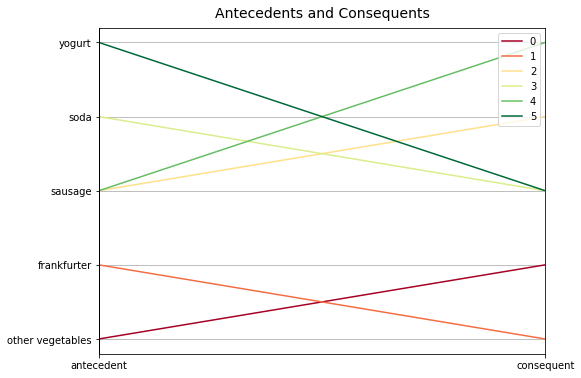

In [36]:
# Generate parallel coordinates plot
plt.figure(figsize = (8, 6))
plt.title('Antecedents and Consequents', fontsize = 14, pad = 10)
parallel_coordinates(coords, 'rule', colormap = 'RdYlGn')

Association rule mining uses special terminology to refer to the items on either side of the rule. The antecedent represents the items in the left-hand side of our rule, i.e. {(other vegetables}, while the value on the right hand-side (i.e. {frankfurter}) is called the consequent. The antecedent is therefore the X value and the consequent is y.

**Heatmap**

Let’s plot a simple heatmap with different measures of interestingness on the axes (consequents and antecedents) and a third measure (support) represented by the color of the squeres.

In [37]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')

Text(32.99999999999999, 0.5, 'consequent')

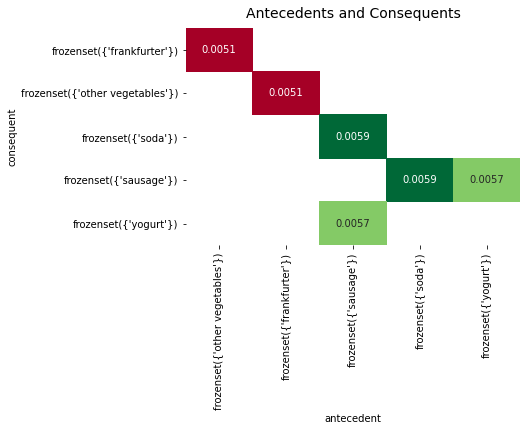

In [38]:
# Generate heatmap
plt.title('Antecedents and Consequents', fontsize = 14, pad = 10)
sns.heatmap(support_table, annot = True, cbar = False, cmap = 'RdYlGn')
plt.xlabel('antecedent', fontsize = 10)
plt.ylabel('consequent', fontsize = 10)